Instructions
-------------
This notebook goes from micro-variable 1D input -- 1D output data to macro-level states. The data comes from Pair 20 used in the Causal Pairs challenge data, created at the Max-Planck-Institute for Biological Cybernetics. The x-coordinates correspond to latitude (of German weather stations) and y-coordinates to temperature. 

To use your own data, you only need to modify the "The Dataset" cell -- substitute your own data for our X and Y arrays. Note: THIS WILL NOT WORK ON MULTI - DIMENSIONAL INPUTS / OUTPUTS! (Although it wouldn't be super hard to modify it to work.)

If you like, you can also experiment with neural net training in the "Learning P(Y | X)" cell. Make sure the validation error converges. Feel free to experiment with other neural net architectures if you're comfortable with Lasagne! If your PC has a GPU, this code will automatically use it. If you have no GPU and the training is slow, you can stop training at any time by pressing ctrl+c (on Linux) and the script will load the best network learned during training on the next step (during training, the current-best net is saved to a file).

Good Luck!

Krzysztof Chalupka, Caltech, July 2016.

In [1]:
""" This cell sets up the Python environment. Make sure you have the following packages installed:
numpy
matplotlib
theano
lasagne
sklearn
All of them are available through $ pip install [package_name]. 
This is only tested on Ubuntu Linux, I've heard Theano is a pain to get working on Windows.
"""
import sys
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import theano
import lasagne

import core_ml
from core_ml import train_mixture_density_network
from core_ml import eval_gaussian_mixture

np.random.seed(1423)
sys.setrecursionlimit(1000000) # Otherwise, joblib won't save deep nets.

clang: error: unknown argument: '-target-feature'
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument '-tbm', did you mean '-mtbm'?
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument '-sha', did you mean '-msha'?
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument '-gfni', did you mean '-mgfni'?
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument '-fma4', did you mean '-mfma4'?
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument '-vpclmulqdq', did you mean '-mvpclmulqdq'?
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument: '-target-feature'
clang: error: unknown argument '-cldemote', did you mean '-mcldemote'?
clang:

00001	#include <Python.h>
00002	#include "theano_mod_helper.h"
00003	#include "structmember.h"
00004	#include <sys/time.h>
00005	
00006	#if PY_VERSION_HEX >= 0x03000000
00007	#include "numpy/npy_3kcompat.h"
00008	#define PyCObject_AsVoidPtr  NpyCapsule_AsVoidPtr
00009	#define PyCObject_GetDesc  NpyCapsule_GetDesc
00010	#define PyCObject_Check NpyCapsule_Check
00011	#endif
00012	
00013	#ifndef Py_TYPE
00014	#define Py_TYPE(obj) obj->ob_type
00015	#endif
00016	
00017	/**
00018	
00019	TODO: 
00020	- Check max supported depth of recursion
00021	- CLazyLinker should add context information to errors caught during evaluation. Say what node we were on, add the traceback attached to the node.
00022	- Clear containers of fully-useed intermediate results if allow_gc is 1
00023	- Add timers for profiling
00024	- Add support for profiling space used.
00025	
00026	
00027	  */
00028	static double pytime(const struct timeval * tv)
00029	{
00030	  struct timeval t;
00031	  if (!tv)
00032	    {
00033	 

Exception: Compilation failed (return status=1): clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-tbm', did you mean '-mtbm'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-sha', did you mean '-msha'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-gfni', did you mean '-mgfni'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-fma4', did you mean '-mfma4'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-vpclmulqdq', did you mean '-mvpclmulqdq'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-cldemote', did you mean '-mcldemote'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-ptwrite', did you mean '-mptwrite'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-movdiri', did you mean '-mmovdiri'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-pconfig', did you mean '--config'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-clwb', did you mean '-mclwb'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-clzero', did you mean '-mclzero'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-pku', did you mean '-mpku'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-rdpid', did you mean '-mrdpid'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-waitpkg', did you mean '-mwaitpkg'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-movdir64b', did you mean '-mmovdir64b'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-sse4a', did you mean '-msse4a'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-vaes', did you mean '-maes'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-mwaitx', did you mean '-mmwaitx'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-wbnoinvd', did you mean '-mwbnoinvd'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-prefetchwt1', did you mean '-mprefetchwt1'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument '-shstk', did you mean '-mshstk'?. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: unknown argument: '-target-feature'. clang: error: no such file or directory: '+sse2'. clang: error: no such file or directory: '+cx16'. clang: error: no such file or directory: '+sahf'. clang: error: no such file or directory: '+prfchw'. clang: error: no such file or directory: '+bmi2'. clang: error: no such file or directory: '+fsgsbase'. clang: error: no such file or directory: '+xsavec'. clang: error: no such file or directory: '+popcnt'. clang: error: no such file or directory: '+aes'. clang: error: no such file or directory: '+xsaves'. clang: error: no such file or directory: '+mmx'. clang: error: language not recognized: 'op'. clang: error: no such file or directory: '+rdseed'. clang: error: no such file or directory: '+clflushopt'. clang: error: no such file or directory: '+xsave'. clang: error: no such file or directory: '+invpcid'. clang: error: no such file or directory: '+avx'. clang: error: no such file or directory: '+rtm'. clang: error: no such file or directory: '+fma'. clang: error: no such file or directory: '+bmi'. clang: error: no such file or directory: '+rdrnd'. clang: error: no such file or directory: '+sse4.1'. clang: error: no such file or directory: '+sse4.2'. clang: error: no such file or directory: '+avx2'. clang: error: no such file or directory: '+sse'. clang: error: no such file or directory: '+lzcnt'. clang: error: no such file or directory: '+pclmul'. clang: error: no such file or directory: '+f16c'. clang: error: no such file or directory: '+ssse3'. clang: error: no such file or directory: '+sgx'. clang: error: no such file or directory: '+cmov'. clang: error: no such file or directory: '+movbe'. clang: error: no such file or directory: '+xsaveopt'. clang: error: no such file or directory: '+adx'. clang: error: no such file or directory: '+sse3'. 

The Dataset
-----------

The following code loads our data into the correct format:
* X -- numpy array of size (n_datapoints, n_input_dim). Each row corresponds to one input value.
* Y -- numpy array of size (n_datapoints, n_output_dim). Each row is one output value.

In our case, each row of X is a (flattened) map of Pacific zonal wind strength, and each row of Y a (flattened) map of Pacific water temperature over the same region. In our case, n_input_dim == n_output_dim, but this need not be the case at all.

In [9]:
# Load the data. 
## PLUG YOUR OWN DATA HERE. 'coords' is only needed to display climate maps. Your data
## can only contain X and Y arrays.
X, Y = joblib.load('pair20.pkl')

# Create a randomized, normalized training and validation set.
shuffled_ids = np.random.permutation(X.shape[0])
X_tr = X[shuffled_ids[:int(X.shape[0]*.9)]]
Y_tr = Y[shuffled_ids[:int(Y.shape[0]*.9)]]
X_ts = X[shuffled_ids[int(X.shape[0]*.9):]]
Y_ts = Y[shuffled_ids[int(Y.shape[0]*.9):]]
x_scaler = StandardScaler().fit(X_tr)
y_scaler = StandardScaler().fit(Y_tr)
X_tr = x_scaler.transform(X_tr)
X_ts = x_scaler.transform(X_ts)
Y_tr = y_scaler.transform(Y_tr)
Y_ts = y_scaler.transform(Y_ts)

Learning P(Y | X)
--------------------
The first step of Causal Feature Learning (CFL) is to cluster x's according to P(Y | x). In this cell, we use a Mixture Density Network (Bishop 1995) implemented in Lasagne/Theano to learn these conditionals. Since our data are 1d, we can visualize the conditionals in a nice plot. As seen, we approximate the true density by a smoothly-varying (with x) mixture of Gaussians. 

NOTE: The neural net training will stop after 1000 epochs. It should take several seconds on a GPU. If you're working on a CPU machine and the training is slow, you can stop it any time by sending a "kernel interrupt" signal to your IPython Notebook. The so-far-best network will have been saved by the program.

Validation loss before training: 61.2117652893.
Starting training...
Epoch 999. Valid loss 30.32 [28.54]. Train loss 23.18.

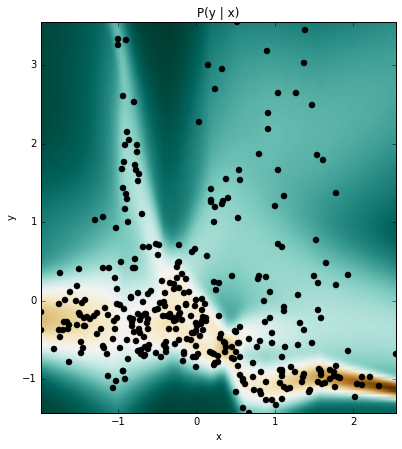

In [10]:
## NOTE: If on the example data your best valid loss (you'll see it printed 
## in square brackets during training) is more than about 30, you might want to
## repeat the training (the network learned a bad local minimum).
train_mixture_density_network(X_tr, Y_tr, X_ts, Y_ts, 
                              save_fname='nn_params/net', n_components=4)
net = joblib.load('nn_params/net')
predictor = theano.function([lasagne.layers.get_all_layers(net)[0].input_var], 
                            lasagne.layers.get_output(net, deterministic=True),
                            allow_input_downcast=True)
density = np.array(
    [eval_gaussian_mixture(predictor(np.array([[x]])), 
                           density_grid=np.linspace(Y.min(), Y.max(),100))
     for x in np.linspace(X.min(), X.max(), 100)])

plt.figure(figsize=(7,7), facecolor='white')
plt.hold('on')
plt.imshow(density.T, origin='low', extent=[X.min(), X.max(), Y.min(), Y.max()],
           cmap='BrBG_r', norm=colors.PowerNorm(gamma=1./3.))
plt.plot(X.flatten(), Y.flatten(), 'ko')
plt.xlim([X.min(), X.max()])
plt.ylim([Y.min(), Y.max()])
plt.xlabel('x')
plt.ylabel('y')
plt.title('P(y | x)')

Finding the Observational Partition of X
-----------------------------------------
Finding the observational partition of X amounts to clustering the X data according to P(Y | X). That is, we put two x's in the same bucket if the neural net we trained maps them to the same values. Note that we simply set the number of causal classes to 5 by hand. There are more principled method of choosing the number of causal states in our Visual Causal Feature Learning article.

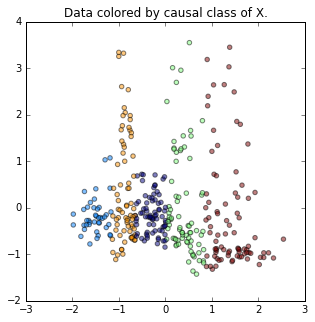

In [11]:
""" Discover the observational classes of X. """

N_CLASSES = 5
p_y_x = predictor(X)
x_lbls = KMeans(n_clusters=N_CLASSES, n_init=10, n_jobs=-1).fit_predict(p_y_x)
plt.figure(figsize=(5,5), facecolor='white')
plt.scatter(X, Y, c=x_lbls, alpha=.5)
plt.title('Data colored by causal class of X.')

Finding the Observational Partition of Y
---------------------------------------------
To find the partition of Y, we want to put together all y1 and y2 if P(y1 | x) == P(y2 | x) for each x. Again, we set the number of states to 5 by hand. 
NOTE: In the example data, if everything went right, you should see that the "lowest" y's belong to the same observational class as the "highest" y's. To understand why, take a close look at the density function we learned. Both for large and small y's, the learned distribution is bimodal due to continuity assumptions of the neural net.

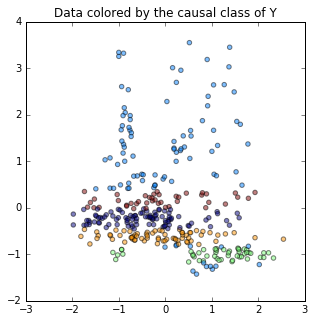

In [12]:
""" Discover the observational classes of Y. """
y_ftrs = np.array([eval_gaussian_mixture(predictor(np.array([[x]])), density_grid=Y.flatten())
           for x in X.flatten()]).T
y_lbls = KMeans(n_clusters=N_CLASSES, n_init=10, n_jobs=-1).fit_predict(y_ftrs)

plt.figure(figsize=(5,5), facecolor='white')
plt.title('Data colored by the causal class of Y')
plt.scatter(X, Y, c=y_lbls, alpha=.5)